In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("climate_change.csv")
df.head()

,Year,Region,Temperature (°C),Rainfall (mm),CO2 Levels (ppm),Crop Type,Yield (tons per hectare),Anomaly (%)
0,2009,North America,14.45,1095.78,403.66,Barley,7.27,12.28
1,2010,Europe,21.25,479.66,376.12,Sorghum,9.72,-15.21
2,2022,Australia,21.06,711.43,403.16,Sorghum,7.43,-6.41
3,2005,Africa,18.39,1257.23,371.34,Rice,2.93,-4.67
4,2010,North America,14.49,592.02,449.02,Wheat,8.37,5.88


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      100 non-null    int64  
 1   Region                    100 non-null    object 
 2   Temperature (°C)          100 non-null    float64
 3   Rainfall (mm)             100 non-null    float64
 4   CO2 Levels (ppm)          100 non-null    float64
 5   Crop Type                 100 non-null    object 
 6   Yield (tons per hectare)  100 non-null    float64
 7   Anomaly (%)               100 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.4+ KB


In [5]:
#descriptive statistic of our data
df.describe()

,Year,Temperature (°C),Rainfall (mm),CO2 Levels (ppm),Yield (tons per hectare),Anomaly (%)
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2011.16000,23.018200,884.129000,400.926100,5.859200,0.215700
std,7.14174,6.750243,311.688332,27.909861,2.594586,11.509136
min,2000.00000,12.200000,309.040000,350.910000,1.510000,-19.900000
25%,2005.00000,17.412500,641.832500,378.630000,3.430000,-8.672500
50%,2010.00000,23.420000,863.360000,402.285000,5.780000,-0.135000
75%,2018.25000,28.327500,1137.375000,424.687500,8.265000,9.725000
max,2022.00000,34.760000,1458.370000,449.020000,9.940000,20.000000


In [6]:
df.isnull().sum()

,0
Year,0
Region,0
Temperature (°C),0
Rainfall (mm),0
CO2 Levels (ppm),0
Crop Type,0
Yield (tons per hectare),0
Anomaly (%),0


[]

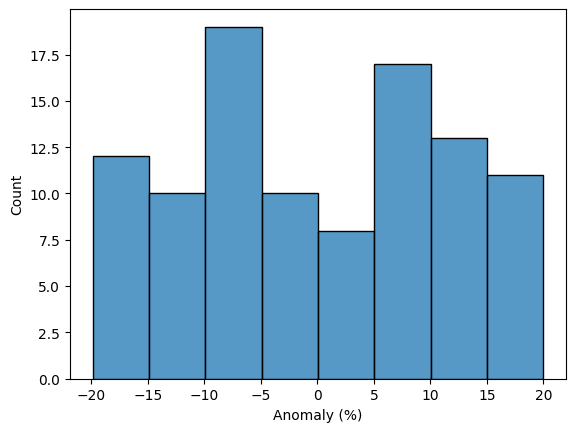

In [7]:
sns.histplot(df["Anomaly (%)"])
plt.plot()

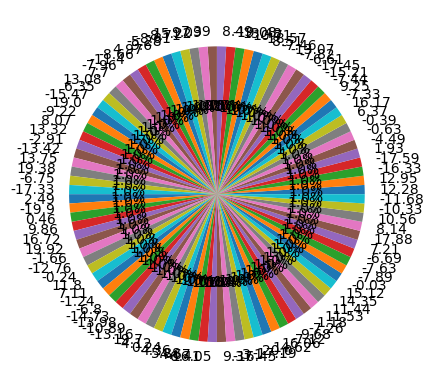

In [8]:
plt.pie(df['Anomaly (%)'].value_counts().values,
        labels = df['Anomaly (%)'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [9]:
# Step 2: Preprocess Data
# Encode categorical column 'State'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
#fit_transform is responsible for doing three steps
#1)find unique values
#2)arrange in alphabetical order
#3)gives no. from 0
#

In [10]:
# Step 2: Preprocess Data
# Encode categorical column 'State'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Crop Type'] = label_encoder.fit_transform(df['Crop Type'])

In [11]:
df.head()

,Year,Region,Temperature (°C),Rainfall (mm),CO2 Levels (ppm),Crop Type,Yield (tons per hectare),Anomaly (%)
0,2009,4,14.45,1095.78,403.66,0,7.27,12.28
1,2010,3,21.25,479.66,376.12,3,9.72,-15.21
2,2022,2,21.06,711.43,403.16,3,7.43,-6.41
3,2005,0,18.39,1257.23,371.34,2,2.93,-4.67
4,2010,4,14.49,592.02,449.02,5,8.37,5.88


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Example: RandomForest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

